#### Bayesian Analysis of Population Data

*AM207 2015 - Final Project Analysis*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from IPython import display
import time
import math
import pandas as pd
from collections import defaultdict
import scipy as sp
from statsmodels.graphics.gofplots import qqplot_2samples
# for pure convenience
from scipy.stats import norm
# you don't have to use seaborn if you prefer plain matplotlib
sns.set_context('paper')
import random
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2

We now turn to a Bayesian analysis of the dependence of life expectancy on various factors. We investigated 57 different factors which are listed below.  

In [3]:
#---------------- Life Expectancy --------------#

# Life expectancy at birth, total (years) ------------- 1
data_le = pd.DataFrame.from_csv("Data\sp.dyn.le00.in_Indicator_en_csv_v2.csv",header=2)

# Life expectancy at birth, female (years) ------------- 2
data_lefe = pd.DataFrame.from_csv("Data\sp.dyn.le00.fe.in_Indicator_en_csv_v2.csv",header=2)

# Life expectancy at birth, male (years) ------------- 3
data_lema = pd.DataFrame.from_csv("Data\sp.dyn.le00.ma.in_Indicator_en_csv_v2.csv",header=2)

#----------------Education-------------------------#

# Public spending on education, total (% of government expenditure) ------------- 4
data_totlgb = pd.DataFrame.from_csv("Data\se.xpd.totl.gb.zs_Indicator_en_csv_v2.csv",header=2)

# Public spending on education, total (% of GDP) ----------------- 5
data_totlgd = pd.DataFrame.from_csv("Data\se.xpd.totl.gd.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, primary (% of GDP per capita) ------------- 6
data_primpc = pd.DataFrame.from_csv("Data\se.xpd.prim.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, secondary (% of GDP per capita) ------------- 7
data_secopc = pd.DataFrame.from_csv("Data\se.xpd.seco.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Expenditure per student, tertiary (% of GDP per capita) --------------- 8
data_tertpc = pd.DataFrame.from_csv("Data\se.xpd.tert.pc.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, youth male (% of males ages 15-24) ------------------ 9
data_1524ltma = pd.DataFrame.from_csv("Data\se.adt.1524.lt.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, youth female (% of females ages 15-24) ---------------- 10
data_1524ltfe = pd.DataFrame.from_csv("Data\se.adt.1524.lt.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Literacy rate, adult total (% of people ages 15 and above) ------------- 11
data_litr = pd.DataFrame.from_csv("Data\se.adt.litr.zs_Indicator_en_csv_v2.csv",header=2)

# Children out of school, primary, female ------------------- 12
data_unerfe = pd.DataFrame.from_csv("Data\se.prm.uner.fe_Indicator_en_csv_v2.csv",header=2)

# Children out of school, primary, male --------------------- 13
data_unerma = pd.DataFrame.from_csv("Data\se.prm.uner.ma_Indicator_en_csv_v2.csv",header=2)

# Trained teachers in primary education (% of total teachers) -------------- 14
data_tcaq = pd.DataFrame.from_csv("Data\se.prm.tcaq.zs_Indicator_en_csv_v2.csv",header=2)

# Pupil-teacher ratio, primary --------------------- 15
data_enrltc = pd.DataFrame.from_csv("Data\se.prm.enrl.tc.zs_Indicator_en_csv_v2.csv",header=2)

# Progression to secondary school, female (%)----------------- 16
data_progfe = pd.DataFrame.from_csv("Data\se.sec.prog.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Progression to secondary school, male (%)----------------- 17
data_progma = pd.DataFrame.from_csv("Data\se.sec.prog.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Ratio of female to male primary enrollment (%)----------------- 18
data_primfm = pd.DataFrame.from_csv("Data\se.enr.prim.fm.zs_Indicator_en_csv_v2.csv",header=2)

# Ratio of female to male tertiary enrollment (%)----------------- 19
data_tertfm = pd.DataFrame.from_csv("Data\se.enr.tert.fm.zs_Indicator_en_csv_v2.csv",header=2)

#------------------Population------------------------#

# Population ages 0-14 (% of total)----------------- 20
data_0014to = pd.DataFrame.from_csv("Data\sp.pop.0014.to.zs_Indicator_en_csv_v2.csv",header=2)

# Population ages 15-64 (% of total)----------------- 21
data_1564to = pd.DataFrame.from_csv("Data\sp.pop.1564.to.zs_Indicator_en_csv_v2.csv",header=2)

#------------Unemployment rates----------------------#

# Unemployment, male (% of male labor force) (modeled ILO estimate)----------------- 22
data_totlma = pd.DataFrame.from_csv("Data\sl.uem.totl.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Unemployment, female (% of female labor force) (modeled ILO estimate)----------------- 23
data_totlfe = pd.DataFrame.from_csv("Data\sl.uem.totl.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Employment to population ratio, 15+, total (%) (modeled ILO estimate)----------------- 24
data_totlsp = pd.DataFrame.from_csv("Data\sl.emp.totl.sp.zs_Indicator_en_csv_v2.csv",header=2)

# Long-term unemployment, male (% of male unemployment)----------------- 25
data_ltrmma = pd.DataFrame.from_csv("Data\sl.uem.ltrm.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Long-term unemployment, female (% of female unemployment)----------------- 26
data_ltrmfe = pd.DataFrame.from_csv("Data\sl.uem.ltrm.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force, total----------------- 27
data_totlin = pd.DataFrame.from_csv("Data\sl.tlf.totl.in_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)----------------- 28
data_cactfe = pd.DataFrame.from_csv("Data\sl.tlf.cact.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)----------------- 29
data_cactma = pd.DataFrame.from_csv("Data\sl.tlf.cact.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)----------------- 30
data_cactzs = pd.DataFrame.from_csv("Data\sl.tlf.cact.zs_Indicator_en_csv_v2.csv ",header=2)

# Vulnerable employment, female (% of female employment)----------------- 31
data_vulnfe = pd.DataFrame.from_csv("Data\sl.emp.vuln.fe.zs_Indicator_en_csv_v2.csv",header=2)

# Vulnerable employment, male (% of male employment)----------------- 32
data_vulnma = pd.DataFrame.from_csv("Data\sl.emp.vuln.ma.zs_Indicator_en_csv_v2.csv",header=2)

# Vulnerable employment, total (% of total employment)----------------- 33
data_vulnzs = pd.DataFrame.from_csv("Data\sl.emp.vuln.zs_Indicator_en_csv_v2.csv",header=2)

#--------------Income distribution-------------------#

# Income share held by highest 10%----------------- 34
data_10th10 = pd.DataFrame.from_csv("Data\si.dst.10th.10_Indicator_en_csv_v2.csv",header=2)

# Income share held by highest 20%----------------- 35
data_05th20 = pd.DataFrame.from_csv("Data\si.dst.05th.20_Indicator_en_csv_v2.csv",header=2)

# Income share held by lowest 10%----------------- 36
data_frst10 = pd.DataFrame.from_csv("Data\si.dst.frst.10_Indicator_en_csv_v2.csv",header=2)

# Income share held by lowest 20%----------------- 37
data_frst20 = pd.DataFrame.from_csv("Data\si.dst.frst.20_Indicator_en_csv_v2.csv",header=2)

# Poverty gap at $1.25 a day (PPP) (%)----------------- 38
data_gaps_In = pd.DataFrame.from_csv("Data\si.pov.gaps_Indicator_en_csv_v2.csv",header=2)

# Poverty gap at national poverty lines (%)----------------- 39
data_nagp_In = pd.DataFrame.from_csv("Data\si.pov.nagp_Indicator_en_csv_v2.csv",header=2)

# Poverty headcount ratio at $1.25 a day (PPP) (% of population)----------------- 40
data_dday_In = pd.DataFrame.from_csv("Data\si.pov.dday_Indicator_en_csv_v2.csv",header=2)

# Poverty headcount ratio at national poverty lines (% of population)----------------- 41
data_nahc_In = pd.DataFrame.from_csv("Data\si.pov.nahc_Indicator_en_csv_v2.csv",header=2)

# Rural poverty gap at national poverty lines (%)----------------- 42
data_rugp_In = pd.DataFrame.from_csv("Data\si.pov.rugp_Indicator_en_csv_v2.csv",header=2)

# Rural poverty headcount ratio at national poverty lines (% of rural population)----------------- 43
data_ruhc_In = pd.DataFrame.from_csv("Data\si.pov.ruhc_Indicator_en_csv_v2.csv",header=2)

# Urban poverty gap at national poverty lines (%)----------------- 44
data_urgp_In = pd.DataFrame.from_csv("Data\si.pov.urgp_Indicator_en_csv_v2.csv",header=2)

# Urban poverty headcount ratio at national poverty lines (% of urban population)----------------- 45
data_urhc_In = pd.DataFrame.from_csv("Data\si.pov.urhc_Indicator_en_csv_v2.csv",header=2)

# --------------Crime rates/murder rates------------------------------------#

# Intentional homicide count and rate per 100,000 population, by country/territory (2000-2012)----------------- 46
data__Homicide = pd.DataFrame.from_csv("Data\GSH2013_Homicide_count_and_rate.csv",header=0)

# Percentage of male and female intentional homicide victims, by country/territory, criminal justice source (2000-2012)---- 47
data__Sex_time = pd.DataFrame.from_csv("Data\GSH2013_Sex_time_series.csv",header=0)

# Intentional homicide count and rate per 100,000 population in the most populous city, by country/territory (2005-2012)------ 48
data__City = pd.DataFrame.from_csv("Data\GSH2013_City_data.csv",header=0)

# Intentional homicide victims killed by gangs or organised criminal groups as percentage of total homicide victims by country/territory (2005-2012)--- 49
data__OC = pd.DataFrame.from_csv("Data\GSH2013_OC.csv",header=0)

# Male and female intentional homicide victims killed by intimate partners or family members as a percentage of total homicide victims, by country/territory--- 50
data__IPFM = pd.DataFrame.from_csv("Data\GSH2013_IPFM.csv",header=0)

# Intentional homicide victims killed during commission of a robbery as percentage of total homicide victims, by country/territory (2005-2012)--- 51
data__robbery = pd.DataFrame.from_csv("Data\GSH2013_robbery.csv",header=0)

# -------------- Infrastructure --------------------------------------------#

# Improved water source, urban (% of urban population with access)---------------- 52 
data_h20safe = pd.DataFrame.from_csv("Data\sh.h2o.safe.ur.zs_Indicator_en_csv_v2.csv",header=2)

# Internet users (per 100 people)--------------------------- 53
data_netuser = pd.DataFrame.from_csv("Data\it.net.user.p2_Indicator_en_csv_v2.csv",header=2)

# ------------------- Quality of Health System --------------------------------- #

# Health expenditure per capita (current US$)------------------------- 54
data_pcapIn = pd.DataFrame.from_csv("Data\sh.xpd.pcap_Indicator_en_csv_v2.csv",header=2)

# Health expenditure, private (% of GDP)------------------------------- 55
data_privzs = pd.DataFrame.from_csv("Data\sh.xpd.priv.zs_Indicator_en_csv_v2.csv",header=2)

# Health expenditure, public (% of GDP)----------------------------- 56
data_publzs = pd.DataFrame.from_csv("Data\sh.xpd.publ.zs_Indicator_en_csv_v2.csv",header=2)

# ------------------ Affordability of Housing ----------------------------------- #

# Housing price to income ratio, 2010 = 100--------------------------- 57
data_housingptoi = pd.DataFrame.from_csv("Data\housing_pricetoincome.csv",header=0)

# ----------------- Civic Involvement ------------------------------------------- #

# Voter turnout, Parliamentary------------------------------------------- 58
data_voter_parl = pd.DataFrame.from_csv("Data\Parl_voter_turnout_04_16_2015.csv",header=0)

# Voting aged population turnout, Parliamentary------------------------------------------- 59
data_vap_parl = pd.DataFrame.from_csv("Data\Parl_vap_turnout_04_16_2015.csv",header=0)

# Voter turnout, Presidential------------------------------------------- 60
data_voter_pres = pd.DataFrame.from_csv("Data\Pres_voter_turnout_04_16_2015.csv",header=0)

# Voting aged population turnout, Presidential------------------------------------------- 61
data_vap_pres = pd.DataFrame.from_csv("Data\Pres_vap_turnout_04_16_2015.csv",header=0)


In [3]:
# Collect all factors into a single list
file_list = [data_le,data_lefe,data_lema,data_totlgb,data_totlgd,data_primpc,data_secopc,data_tertpc,data_1524ltma,data_1524ltfe,data_litr,data_unerfe,data_unerma,data_tcaq,data_enrltc,data_progfe,data_progma,data_primfm,data_tertfm,data_0014to,data_1564to,data_totlma,data_totlfe,data_totlsp,data_ltrmma,data_ltrmfe,data_totlin,data_cactfe,data_cactma,data_cactzs,data_vulnfe,data_vulnma,data_vulnzs,data_10th10,data_05th20,data_frst10,data_frst20,data_gaps_In,data_nagp_In,data_dday_In,data_nahc_In,data_rugp_In,data_ruhc_In,data_urgp_In,data_urhc_In,data__Homicide,data__Sex_time,data__City,data__OC,data__IPFM,data__robbery,data_h20safe,data_netuser,data_pcapIn,data_privzs,data_publzs,data_housingptoi,data_voter_parl,data_vap_parl,data_voter_pres,data_vap_pres]


In [315]:
# obtain the years with the most data points for each factor
uuu = []
for file_number in range(56)+range(57,61): # iterate over all files with usable data
    tt = []
    uu = []
    for key in file_list[file_number]: # iterate over all keys or headers in the file
        if key.isdigit(): # check that the key is a year
            t = 0
            for number in file_list[file_number][key]: 
                if not 0*number: # count the number of data points
                    t += 1
            tt.append(t) # store the numer of data points for a given year 
            uu.append(key) # store the corresponding year
    tt = np.array(tt)
    maximum = np.argmax(tt)   # find the maximum number of data points
    uuu.append(uu[maximum])    # store the corresponding year
        
        
        
        
        
        
    

In [316]:
# count the number of occurrences of each year and store in a dictionary
d = defaultdict(int)
for year in uuu:
    d[year] += 1

In [317]:
d

defaultdict(<type 'int'>, {'1991': 3, '1990': 5, '1999': 1, '2002': 6, '2000': 4, '2001': 3, '2006': 2, '2007': 1, '2004': 6, '2005': 4, '2008': 7, '2009': 5, '2011': 3, '2010': 9, '2012': 1})

In [76]:
# energy function for simulated annealing for a given year in this case 2010
def energy(file_lists,perm):
    dictionary = {}
    dictionary['y'] = file_list[2]['2010']
    string = "y~"
    for j in perm:
        if j > 2 and j not in [56]: 
            dictionary['x%d'%j] = file_list[j]['2010']
            string += 'x%d+'%j

    data = pd.DataFrame(dictionary)
    
    string = string[0:len(string)-1]
    if len(data.dropna())>5*len(perm): # enforce an energy cost for having too few data points
        model = ols(string,data).fit()
    else:
        return 1
    if np.isfinite(model.rsquared_adj):
        return -1.0*model.rsquared_adj
    else:
        return 1

# to choose a different subset of the total number of factors
def changeperm(perm, L,prev_E,N):
    permut = perm[:]
    if prev_E == 1:
        u = np.random.choice(permut)
        permut.remove(u)
        if len(permut) == 0:
            permut = [np.random.choice(range(3,56)+range(57,N))]
            return permut
        return permut
    else:
        switch = np.random.randint(3)
        if switch == 0:
            for i in range(L):
                if len(permut) == 0:
                    permut = [np.random.choice(range(3,56)+range(57,N))]
                    return permut
                u = np.random.choice(permut)
                permut.remove(u)
            if len(permut) == 0:
                permut = [np.random.choice(range(3,56)+range(57,N))]
                return permut
            return permut
        if switch == 1:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                if u not in permut:
                    permut = permut+[u]
            return permut
        if switch == 2:
            for i in range(L):
                u = np.random.choice(range(3,56)+range(57,N))
                a = np.random.randint(len(permut))
                if u not in permut:
                    permut[a] = u
            return permut
                
                
        
                
def simulated_annealing( file_lists, init_temp, thermostat, ftol, itol, otol, reannealing):
    # file_lists is a list of data files
    # init_temp is the initial temperature
    # thermostat gives the factor by which to multiply the temperature when cooling
    # ftol, itol and otol are stopping parameters
    # reannealing tells us when to cool down
    
    m=10000     
    amount=[]
    temperature = init_temp   


    N = len(file_lists)
    
    # number of accepted steps
    it = 0                
    
    # start by using all files
    perm = range(N)
    s = perm[:]
    # starting ENERGY 
    prev_E = energy(file_lists,perm)  
    holder = prev_E
    
    # number of iterations
    atp=0
    
    while it >=0:
        ## NUMBER OF SWAPS IS L
        L = np.max((np.floor(np.sqrt(temperature)).astype(int),1))
        propose_perm = changeperm(perm, L,prev_E,N)

        new_E = energy(file_lists,propose_perm)
        deltaE  =  new_E -prev_E 

        if new_E < prev_E:
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E  
            it = it+1
            if new_E < holder:
                s = perm[:]
                holder = new_E
            
        elif np.random.rand() < np.exp( -deltaE/temperature):
            perm  = propose_perm
            amount.append(new_E)
            prev_E = new_E 
            it = it+1
            
        atp =atp +1;  # NUMBER OF ITERATIONS
        
        # check if it is time to cool down
        if it % reannealing == 0:
            temperature = thermostat * temperature;
            
            #if we get too cold, reheat
            if temperature < 0.0001:
                temperature = 0.01
                
        if len(amount)>m and np.std(amount[-m:])/np.mean(abs(np.array(amount[-m:]))) < ftol:
            print 'ftol'
            break
        if atp >itol:
            print 'itol'
            break
        if len(amount)> 0 and amount[-1] <= otol:
            print 'otol'
            print amount[-1]
            break 
    
    return s, amount


In [5]:
# to use all the data
dictionary1 = {}
dictionary1['y'] = []
for key in file_list[0]:
    if key.isdigit():
        for number in range(len(file_list[0][key])):
            dictionary1['y'] += [file_list[0][key][number]]
for j in range(61):
        if j > 2 and j not in [56]: 
            dictionary1['x%d'%j] = []
            for key in file_list[j]:
                if key.isdigit():
                    for number in range(len(file_list[j][key])):
                        dictionary1['x%d'%j] += [file_list[j][key][number]]

In [6]:
# redefine the energy function for all the data
def energy(file_lists,perm):
    dictionary = {}
    dictionary['y'] = dictionary1['y']
    string = "y~"
    for j in perm:
        if j > 2 and j not in [56]: 
            dictionary['x%d'%j] = dictionary1['x%d'%j]
            string += 'x%d+'%j

    data = pd.DataFrame(dictionary)
    
    string = string[0:len(string)-1]
    if len(data.dropna())>5*len(perm): # enforce an energy cost for having too few data points
        model = ols(string,data).fit()
    else:
        return 1
    if np.isfinite(model.rsquared_adj):
        return -1.0*model.rsquared_adj
    else:
        return 1
    


In [79]:
# perform a run
s22, amount22 = simulated_annealing( file_list, 10.0, 0.99, 0.0001, 30000, -1, 10)

itol


[37, 9] [19, 4, 23, 27, 52, 17] [39, 9, 52, 23, 27, 8, 19] [52, 17, 29, 28, 19, 23, 18]


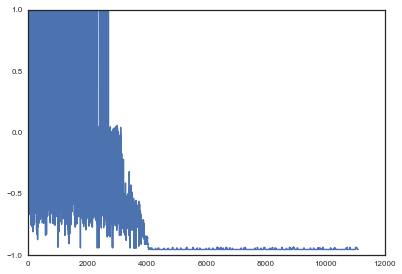

In [613]:
# sample trace
print s10,s11,s7,s12
plt.plot(amount10)

In [58]:
# output the fit results
dictionary = {}
dictionary['y'] = file_list[0]['2010']
string = "y~"
for j in s14: #, 52, 23, 27, 8, 19
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model = ols(formula = string,data=data).fit()

In [59]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 12 May 2015   Prob (F-statistic):           9.04e-18
Time:                        13:36:16   Log-Likelihood:                -42.744
No. Observations:                  30   AIC:                             97.49
Df Residuals:                      24   BIC:                             105.9
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     32.1960      4.425      7.276      0.000        23.063    41.329
x39           -0.0578      0.035     -1.667      0.1

In [612]:
# sample list of factors
print "For 2009:"
for index in s12:
    print file_list[index]['Indicator Name'][0]

For 2009:
Internet users (per 100 people)
Ratio of female to male primary enrollment (%)
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)
Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)
Population ages 0-14 (% of total)
Employment to population ratio, 15+, total (%) (modeled ILO estimate)
Ratio of female to male tertiary enrollment (%)


In [17]:
# For the Bayesian analysis, define the log of the prior distribution
def logprior(b, sigma2, opt1,nu):
    if opt1 == "flat":
        return -np.log(sigma2)
    if opt1 == "conjugate":
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - 2.0*np.log(sigma2) - 0.5/sigma2
    if opt1 == "conjugate2":
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - 4.0*np.log(sigma2) - 0.5/sigma2
    if opt1 == "test": # effectively a conjugate distribution as well, but with variable degree of freedom for the t-distribution
        t = -(b[0]-40.)**2*2.
        for index in xrange(1,len(b)):
            t += -b[index]**2*2.
        return t - (nu/2.+1.)*np.log(sigma2) - 0.5/sigma2

# For the Bayesian analysis, define the log of the likelihood distribution
def loglikelihood(b, sigma2, x, y, opt2,nu):
    n = len(x[0])
    if opt2 == "gaussian":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 0.5*((y-b[0]-vec)**2).sum()/sigma2
    if opt2 == "t":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 1.5*(np.log(1+0.5*(y-b[0]-vec)**2/sigma2)).sum()
    if opt2 == "t6":
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - 3.5*(np.log(1+1./6.*(y-b[0]-vec)**2/sigma2)).sum()
    if opt2 == "test": # likelihood corresponding to t-distributed noise, but with variable degree of freedom
        vec = b[1]*x[0]
        for j in xrange(len(x)-1):
            vec += b[j+2]*x[j+1]
        return -0.5*n*np.log(sigma2) - (nu+1.)/2.*(np.log(1+1./nu*(y-b[0]-vec)**2/sigma2)).sum()

# For the Bayesian analysis, define the log of the posterior distribution
def logpost(b, sigma2, x, y, opt1, opt2,nu):
    return logprior(b, sigma2, opt1,nu) + loglikelihood(b, sigma2, x, y, opt2,nu)

In [18]:
# mcmc algorithm
def mcmc(b, sigma2, x, y, opt1, opt2, N, burnin, e1, e2, e3,nu=6.):
    B = np.zeros((len(b),N))
    Sigma2 = np.zeros(N)
    bnew = np.zeros(len(b))
    bold = b.copy()
    
    sigma2old = sigma2
    count = 0
    r = np.random.random(N)
    for i in xrange(N):
        for j in xrange(len(b)):
            bnew[j] = np.random.normal(bold[j], e1)
        sigma2new = abs(np.random.normal(sigma2old, e3))
        p = logpost(bnew, sigma2new, x, y, opt1, opt2,nu) - logpost(bold, sigma2old, x, y, opt1, opt2,nu)
        if np.log(r[i]) < p:
            bold = bnew.copy()
            sigma2old = sigma2new
            count += 1
                           
        B[:,i]= bold.copy()
        Sigma2[i] = sigma2old
    print "The acceptance rate is "+ str(float(count)/N)+"."
    return np.vstack((B[:,burnin:],Sigma2[burnin:]))

In [19]:
# show posterior mean and variance
def post_ana(res):
    mean = res.mean(axis = 1)
    sd = np.zeros(7)
    sd[0] = np.std(res[0,:])
    sd[1] = np.std(res[1,:])
    sd[2] = np.std(res[2,:])
    sd[3] = np.std(res[3,:])
    sd[4] = np.std(res[4,:])
    sd[5] = np.std(res[5,:])
    sd[6] = np.std(res[6,:])
    print "The posterior mean and standard deviation for beta0 are "+str(mean[0])+" and "+str(sd[0])+"."
    print "The posterior mean and standard deviation for beta1 are "+str(mean[1])+" and "+str(sd[1])+"."
    print "The posterior mean and standard deviation for beta2 are "+str(mean[2])+" and "+str(sd[2])+"."
    print "The posterior mean and standard deviation for beta3 are "+str(mean[3])+" and "+str(sd[3])+"."
    print "The posterior mean and standard deviation for beta4 are "+str(mean[4])+" and "+str(sd[4])+"."
    print "The posterior mean and standard deviation for beta5 are "+str(mean[5])+" and "+str(sd[5])+"."
    print "The posterior mean and standard deviation for sigma2 are "+str(mean[6])+" and "+str(sd[6])+"."

In [20]:
# autocorrelation plot
def plot_acf_lm(res, lags):
    autob0 = acf(res[0,:], nlags = lags)
    autob1 = acf(res[1,:], nlags = lags)
    autosigma2 = acf(res[6,:], nlags = lags)
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.plot(autob0)
    plt.xlabel("lag")
    plt.ylim((0,1))
    plt.title("Autocorrelation plot of beta0")
    plt.subplot(132)
    plt.plot(autob1)
    plt.ylim((0,1))
    plt.xlabel("lag")
    plt.title("Autocorrelation plot of beta1")
    plt.subplot(133)
    plt.plot(autosigma2)
    plt.ylim((0,1))
    plt.xlabel("lag")
    plt.title("Autocorrelation plot of sigma2")
    plt.show()

In [21]:
# posterior histogram
def plot_hist(res):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt.hist(res[0,:])
    plt.title("Histogram of beta0")
    plt.subplot(132)
    plt.hist(res[1,:])
    plt.title("Histogram of beta1")
    plt.subplot(133)
    plt.hist(res[6,:])
    plt.title("Histogram of sigma2")

In [23]:
# compute the predictive intervals at each x, basically the algorithm perturbs the fitted line with noise according to the 
# appropriate distribution and does this for each set of fitted coefficients computed in the mcmc algorithm and for each
# data point as well. For each data point we find the predictive interval by sorting the data (which has been replicated and 
# independent random noise added to each of the replicated data points) according to percentile, extracting the values at the 97.5th 
# and 2.5th percentiles and (later) subtracting those values.
def predict(res, x, y, m, opt2):
    n = len(x[0])
    q = len(x)
    count = 0
    Result = np.zeros((n, res.shape[1]*m))
    if opt2 == "gaussian":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.normal(scale = res[6,i], size=m*n).reshape((n,m)) + np.repeat(vec,m, axis=1)
    if opt2 == "t":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=2, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    if opt2 == "t6":
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=6, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    if opt2 == "test": # for t-distributed noise as well 
        for i in xrange(res.shape[1]):
            vec = res[0,i] + res[1,i]*np.array(x[0]).reshape(n,1)
            for j in xrange(len(x)-1):
                vec += res[j+2,i]*np.array(x[j+1]).reshape(n,1)
            Result[:,(i*m):(i*m+m)] = np.random.standard_t(df=7, size=m*n).reshape((n,m))*res[6,i] + np.repeat(vec,m, axis=1)
    bounds = np.zeros((n,2))
    for i in xrange(n):
        bounds[i,:] = np.percentile(Result[i,:], [2.5,97.5])
        if y[i] < bounds[i,1] and y[i] > bounds[i,0]:
            count += 1
    print "There are "+str(count) +" yis out of "+str(n) +" that fall in the predictive interval."
    return bounds

In [48]:
# number of factors to fit
num_par = len(s14)

# vector of coefficients
b = np.zeros(num_par+1)
b[0] = 40.

# initialize values to be used in mcmc
sigma2 = 1
N = 20000
burnin = 5000
m = 100
dictionary = {}
dictionary['y'] = file_list[0]['2010']
string = "y~"

for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)

feeder = []
for j in s14:
    if j > 2 and j not in [56]: 
        feeder += [data.dropna()['x%d'%j]]
        
# string = string[0:len(string)-1]
# if len(data.dropna())>1:
 #   model = ols(formula = string,data=data).fit()


In [49]:
e1, e2, e3 = 0.15, 0.15, 0.25
res_gaussian_flat = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "flat", "gaussian", N, burnin, e1, e2, e3)
bounds_gaussian_flat = predict(res_gaussian_flat, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "gaussian") 
post_ana(res_gaussian_flat)

The acceptance rate is 0.001.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.7935355709 and 0.11310498454.
The posterior mean and standard deviation for beta1 are -0.132734965453 and 0.0321950419231.
The posterior mean and standard deviation for beta2 are 0.552394857678 and 0.0386238282831.
The posterior mean and standard deviation for beta3 are 0.209038016422 and 0.0663365119543.
The posterior mean and standard deviation for beta4 are 0.127167839341 and 0.0288117772787.
The posterior mean and standard deviation for beta5 are -0.338116246412 and 0.0277138546493.
The posterior mean and standard deviation for sigma2 are 2.95934071889 and 0.0830507143619.


In [50]:
res_gaussian_conjugate = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "conjugate", "gaussian", N, burnin, e1, e2, e3)
bounds_gaussian_conjugate = predict(res_gaussian_conjugate,[data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "gaussian") 
post_ana(res_gaussian_conjugate)

The acceptance rate is 0.00085.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.5548618427 and 0.129425347803.
The posterior mean and standard deviation for beta1 are -0.145137236028 and 0.0256610408998.
The posterior mean and standard deviation for beta2 are 0.457338757851 and 0.0665253448867.
The posterior mean and standard deviation for beta3 are 0.150656779682 and 0.0548152705509.
The posterior mean and standard deviation for beta4 are 0.174338622726 and 0.0241827835909.
The posterior mean and standard deviation for beta5 are -0.269418385815 and 0.0528079898226.
The posterior mean and standard deviation for sigma2 are 2.00094818238 and 0.286382876265.


In [51]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_t_flat = mcmc(b, sigma2,[data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "flat", "t", N, burnin, e1, e2, e3)
bounds_t_flat = predict(res_t_flat, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "t") 
post_ana(res_t_flat)

The acceptance rate is 0.00075.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.6201545037 and 0.057413537028.
The posterior mean and standard deviation for beta1 are -0.158141665393 and 0.00868636233612.
The posterior mean and standard deviation for beta2 are 0.484327919157 and 0.0311699867397.
The posterior mean and standard deviation for beta3 are 0.161791591818 and 0.010692625669.
The posterior mean and standard deviation for beta4 are 0.152445281809 and 0.0105472065765.
The posterior mean and standard deviation for beta5 are -0.269591475746 and 0.0267325710234.
The posterior mean and standard deviation for sigma2 are 0.823066856281 and 0.0358474727366.


In [52]:
res_t_conjugate = mcmc(b, sigma2, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], "conjugate", "t", N, burnin, e1, e2, e3)
bounds_t_conjugate = predict(res_t_conjugate, [data.dropna()['x39'],data.dropna()['x23'],data.dropna()['x52'],data.dropna()['x9'],data.dropna()['x27']], data.dropna()['y'], m, "t") 
post_ana(res_t_conjugate)

The acceptance rate is 0.0019.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.1025119104 and 0.0667268546408.
The posterior mean and standard deviation for beta1 are -0.119658865226 and 0.015989714647.
The posterior mean and standard deviation for beta2 are 0.417385798987 and 0.0262377611553.
The posterior mean and standard deviation for beta3 are 0.189793614679 and 0.0194501094793.
The posterior mean and standard deviation for beta4 are 0.173686540335 and 0.0114168967163.
The posterior mean and standard deviation for beta5 are -0.262086041002 and 0.0254649658877.
The posterior mean and standard deviation for sigma2 are 0.494001377537 and 0.0892443190709.


In [34]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_t6_conjugate2 = mcmc(b, sigma2, feeder, data.dropna()['y'], "conjugate2", "t6", N, burnin, e1, e2, e3)
bounds_t6_conjugate2 = predict(res_t6_conjugate2, feeder, data.dropna()['y'], m, "t6") 
post_ana(res_t6_conjugate2)

The acceptance rate is 0.0015.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.7949588954 and 0.127499726237.
The posterior mean and standard deviation for beta1 are -0.130084783446 and 0.0152432220442.
The posterior mean and standard deviation for beta2 are 0.555575841828 and 0.0604332313898.
The posterior mean and standard deviation for beta3 are 0.222687794361 and 0.0420475739778.
The posterior mean and standard deviation for beta4 are 0.123994328924 and 0.0274178365817.
The posterior mean and standard deviation for beta5 are -0.345287094223 and 0.0441292776479.
The posterior mean and standard deviation for sigma2 are 1.27956863277 and 0.13034597002.


In [35]:
e1, e2, e3 = 0.1, 0.1, 0.1
res_test = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,1.)
bounds_test = predict(res_test, feeder, data.dropna()['y'], m, "test",1) 
post_ana(res_test)

The acceptance rate is 0.0014.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.8405184126 and 0.12120152784.
The posterior mean and standard deviation for beta1 are -0.132595024294 and 0.0179884432266.
The posterior mean and standard deviation for beta2 are 0.485579700074 and 0.0456608011486.
The posterior mean and standard deviation for beta3 are 0.185583059594 and 0.0349738780079.
The posterior mean and standard deviation for beta4 are 0.144424909379 and 0.0237116720339.
The posterior mean and standard deviation for beta5 are -0.283483963312 and 0.0375068196576.
The posterior mean and standard deviation for sigma2 are 1.2226651172 and 0.111977596017.


In [36]:
# t distribution with 10 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test2 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,10.)
bounds_test2 = predict(res_test2, feeder, data.dropna()['y'], m, "test",10) 
post_ana(res_test2)

The acceptance rate is 0.00115.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.8982539778 and 0.150760019332.
The posterior mean and standard deviation for beta1 are -0.13988873087 and 0.018039252122.
The posterior mean and standard deviation for beta2 are 0.487166198664 and 0.0551090721746.
The posterior mean and standard deviation for beta3 are 0.171006035145 and 0.0387708931833.
The posterior mean and standard deviation for beta4 are 0.153604303925 and 0.0226487063035.
The posterior mean and standard deviation for beta5 are -0.292162944405 and 0.0378182105284.
The posterior mean and standard deviation for sigma2 are 1.48627617384 and 0.0592408601659.


In [27]:
# t distribution with 3 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test3 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,3.)
bounds_test3 = predict(res_test3, feeder, data.dropna()['y'], m, "test",3) 
post_ana(res_test3)

The acceptance rate is 0.0012.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.9035593802 and 0.0407102844942.
The posterior mean and standard deviation for beta1 are -0.128000491128 and 0.02025524667.
The posterior mean and standard deviation for beta2 are 0.490167676949 and 0.0380246167207.
The posterior mean and standard deviation for beta3 are 0.188441175511 and 0.0289486391094.
The posterior mean and standard deviation for beta4 are 0.153391262269 and 0.0198297590023.
The posterior mean and standard deviation for beta5 are -0.305308406654 and 0.0175929829314.
The posterior mean and standard deviation for sigma2 are 1.23860020731 and 0.0496029636226.


In [28]:
# t distribution with 4 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test4 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,4.)
bounds_test4 = predict(res_test4, feeder, data.dropna()['y'], m, "test",4) 
post_ana(res_test4)

The acceptance rate is 0.00185.
There are 29 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.2666418531 and 0.0772911721301.
The posterior mean and standard deviation for beta1 are -0.129015188443 and 0.0246906373106.
The posterior mean and standard deviation for beta2 are 0.50657111314 and 0.0316940438432.
The posterior mean and standard deviation for beta3 are 0.19729754402 and 0.0243249729891.
The posterior mean and standard deviation for beta4 are 0.142848219046 and 0.01239581651.
The posterior mean and standard deviation for beta5 are -0.299259408398 and 0.0261785241846.
The posterior mean and standard deviation for sigma2 are 0.80236934686 and 0.171062820575.


In [29]:
# t distribution with 5 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test5 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,5.)
bounds_test5 = predict(res_test5, feeder, data.dropna()['y'], m, "test",5) 
post_ana(res_test5)

The acceptance rate is 0.001.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.803699462 and 0.106979721362.
The posterior mean and standard deviation for beta1 are -0.140102228628 and 0.0127643182028.
The posterior mean and standard deviation for beta2 are 0.503293301447 and 0.0295414570224.
The posterior mean and standard deviation for beta3 are 0.171634167522 and 0.0255530277511.
The posterior mean and standard deviation for beta4 are 0.149255210774 and 0.0142701421551.
The posterior mean and standard deviation for beta5 are -0.299419740244 and 0.0249423126081.
The posterior mean and standard deviation for sigma2 are 1.25309064461 and 0.0415475012631.


In [12]:
# t distribution with 7 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test7 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3)
bounds_test7 = predict(res_test7, feeder, data.dropna()['y'], m, "test") 
post_ana(res_test7)

The acceptance rate is 0.00245.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.2108756222 and 0.30671803171.
The posterior mean and standard deviation for beta1 are -0.122348350351 and 0.0298019431716.
The posterior mean and standard deviation for beta2 are 0.48404004234 and 0.0520063636523.
The posterior mean and standard deviation for beta3 are 0.19957953372 and 0.0492578869525.
The posterior mean and standard deviation for beta4 are 0.157416977524 and 0.0322423363209.
The posterior mean and standard deviation for beta5 are -0.301572197968 and 0.0307555940011.
The posterior mean and standard deviation for sigma2 are 1.46403203338 and 0.0662476694163.


In [24]:
# t distribution with 8 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test8 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,8.)
bounds_test8 = predict(res_test8, feeder, data.dropna()['y'], m, "test",8) 
post_ana(res_test8)

There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 39.9723806334 and 0.0.
The posterior mean and standard deviation for beta1 are -0.133473012677 and 2.77555756156e-17.
The posterior mean and standard deviation for beta2 are 0.5324561783 and 1.11022302463e-16.
The posterior mean and standard deviation for beta3 are 0.182452287191 and 2.77555756156e-17.
The posterior mean and standard deviation for beta4 are 0.140397527799 and 0.0.
The posterior mean and standard deviation for beta5 are -0.334885780569 and 0.0.
The posterior mean and standard deviation for sigma2 are 1.00692202256 and 2.22044604925e-16.


In [32]:
# t distribution with 9 degrees of freedom, conjugate priors
e1, e2, e3 = 0.1, 0.1, 0.1
res_test9 = mcmc(b, sigma2, feeder, data.dropna()['y'], "test", "test", N, burnin, e1, e2, e3,9.)
bounds_test9 = predict(res_test9, feeder, data.dropna()['y'], m, "test",9) 
post_ana(res_test9)

The acceptance rate is 0.0019.
There are 30 yis out of 30 that fall in the predictive interval.
The posterior mean and standard deviation for beta0 are 40.5099457782 and 0.0367298135772.
The posterior mean and standard deviation for beta1 are -0.103709473418 and 0.0182723190455.
The posterior mean and standard deviation for beta2 are 0.439300395925 and 0.0487888530749.
The posterior mean and standard deviation for beta3 are 0.19795745878 and 0.0344932530523.
The posterior mean and standard deviation for beta4 are 0.166058306888 and 0.0233297146785.
The posterior mean and standard deviation for beta5 are -0.294314530272 and 0.032257177443.
The posterior mean and standard deviation for sigma2 are 1.41377749595 and 0.0992828106659.


In [55]:
print "t, conjugate interval", (bounds_t_conjugate[:,1]-bounds_t_conjugate[:,0]).mean()
print "t, conjugate error", (bounds_t_conjugate[:,1]-bounds_t_conjugate[:,0]).std()
print "t, flat interval", (bounds_t_flat[:,1]-bounds_t_flat[:,0]).mean()
print "t, flat error", (bounds_t_flat[:,1]-bounds_t_flat[:,0]).std()
print "Gaussian, conjugate interval", (bounds_gaussian_conjugate[:,1]-bounds_gaussian_conjugate[:,0]).mean()
print "Gaussian, conjugate error", (bounds_gaussian_conjugate[:,1]-bounds_gaussian_conjugate[:,0]).std()
print "Gaussian, flat interval", (bounds_gaussian_flat[:,1]-bounds_gaussian_flat[:,0]).mean()
print "Gaussian, flat error", (bounds_gaussian_flat[:,1]-bounds_gaussian_flat[:,0]).std()

t, conjugate interval 3.77550276576
t, conjugate error 0.328340821727
t, flat interval 7.13582932732
t, flat error 0.0662440972207
Gaussian, conjugate interval 8.3609060435
Gaussian, conjugate error 0.33043957648
Gaussian, flat interval 11.8492235849
Gaussian, flat error 0.214283322851


In [37]:
print "t6, conjugate2 interval", (bounds_t6_conjugate2[:,1]-bounds_t6_conjugate2[:,0]).mean()
print "t6, conjugate2 error", (bounds_t6_conjugate2[:,1]-bounds_t6_conjugate2[:,0]).std()
print "t1, test interval", (bounds_test[:,1]-bounds_test[:,0]).mean()
print "t1, test error", (bounds_test[:,1]-bounds_test[:,0]).std()
print "t10, test interval", (bounds_test2[:,1]-bounds_test2[:,0]).mean()
print "t10, test error", (bounds_test2[:,1]-bounds_test2[:,0]).std()

t6, conjugate2 interval 6.60183702534
t6, conjugate2 error 0.29502129223
t1, test interval 31.0847898059
t1, test error 0.108998102054
t10, test interval 6.80146209481
t10, test error 0.206438272162


In [31]:
print "t3, test interval", (bounds_test3[:,1]-bounds_test3[:,0]).mean()
print "t3, test error", (bounds_test3[:,1]-bounds_test3[:,0]).std()
print "t4, test interval", (bounds_test4[:,1]-bounds_test4[:,0]).mean()
print "t4, test error", (bounds_test4[:,1]-bounds_test4[:,0]).std()
print "t5, test interval", (bounds_test5[:,1]-bounds_test5[:,0]).mean()
print "t5, test error", (bounds_test5[:,1]-bounds_test5[:,0]).std()

t3, test interval 8.06071669774
t3, test error 0.136952222501
t4, test interval 4.88419783826
t4, test error 0.190255875436
t5, test interval 6.55565240659
t5, test error 0.101112168124


In [33]:
print "t7, conjugate7 interval", (bounds_test7[:,1]-bounds_test7[:,0]).mean()
print "t7, conjugate7 error", (bounds_test7[:,1]-bounds_test7[:,0]).std()
print "t8, conjugate8 interval", (bounds_test8[:,1]-bounds_test8[:,0]).mean()
print "t8, conjugate8 error", (bounds_test8[:,1]-bounds_test8[:,0]).std()
print "t9, conjugate9 interval", (bounds_test9[:,1]-bounds_test9[:,0]).mean()
print "t9, conjugate9 error", (bounds_test9[:,1]-bounds_test9[:,0]).std()

t7, conjugate7 interval 7.34313224488
t7, conjugate7 error 0.258236560614
t8, conjugate8 interval 4.64375162345
t8, conjugate8 error 0.00415565085243
t9, conjugate9 interval 6.56367169439
t9, conjugate9 error 0.128257955602


In [84]:
# to obtain the naive highest correlated factors
lister = []
enumerator = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2010']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister.append(model.rsquared_adj)
            enumerator.append(j)



In [85]:
# print top five correlated factors
t = np.argsort(lister)[-5:]
for index in t:
    print file_list[enumerator[index]]['Indicator Name'][0]

Internet users (per 100 people)
Poverty gap at $1.25 a day (PPP) (%)
Population ages 0-14 (% of total)
Pupil-teacher ratio, primary
Poverty headcount ratio at $1.25 a day (PPP) (% of population)


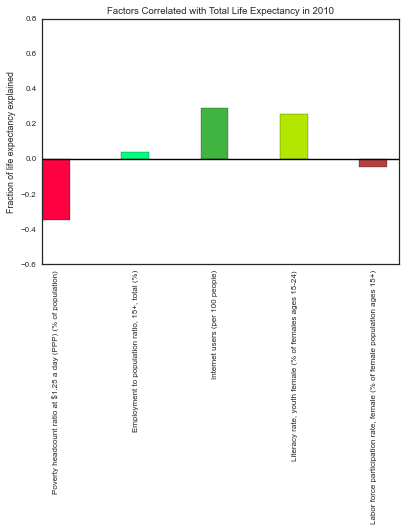

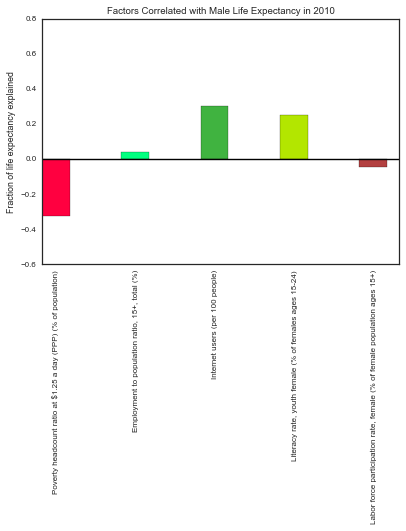

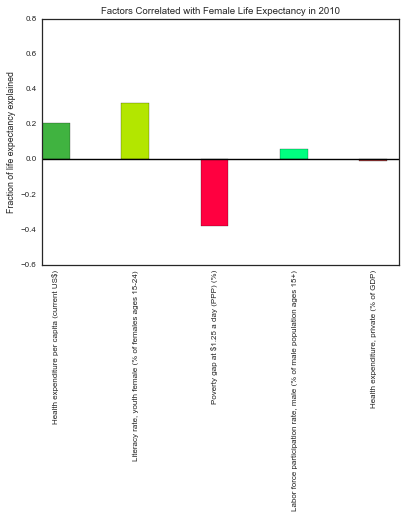

In [278]:
# to plot bar charts
xs = [] 
for index in s14:
    xs += [lister[index-3]]
xs = np.array(xs)
xs = xs/sum(xs)*model.rsquared_adj

xsm = [] 
for index in s14:
    xsm += [listerm[index-3]]
xsm = np.array(xsm)
xsm = xsm/sum(xsm)*modelm.rsquared_adj
xsf = []

for index in s16:
    xsf += [listerf[index-3]]
xsf = np.array(xsf)
xsf = xsf/sum(xsf)*modelf.rsquared_adj

N = len(xs)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, xs,   width, color=((1,0,0.25),(0,1,0.5),(0.25,0.7,0.25),(0.7,0.9,0),(0.7,0.25,0.25)), bottom=(-xs[0],0,0,0,-xs[4]))

plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Total Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]),rotation=90 )
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
plt.show()

plt.figure
p2 = plt.bar(ind, xsm,   width, color=((1,0,0.25),(0,1,0.5),(0.25,0.7,0.25),(0.7,0.9,0),(0.7,0.25,0.25)), bottom=(-xsm[0],0,0,0,-xsm[4]))
plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Male Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s14[0]]['Indicator Name'][0],file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22], file_list[s14[2]]['Indicator Name'][0],file_list[s14[3]]['Indicator Name'][0],file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]),rotation=90 )
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
plt.show()
 
plt.figure
p3 = plt.bar(ind, xsf,   width, color=((0.25,0.7,0.25),(0.7,0.9,0),(1,0,0.25),(0,1,0.5),(0.7,0.25,0.25)), bottom=(0,0,-xsf[2],0,-xsf[4]))
plt.ylabel('Fraction of life expectancy explained')
plt.title('Factors Correlated with Female Life Expectancy in 2010')
plt.xticks(ind+width/2., (file_list[s16[0]]['Indicator Name'][0],file_list[s16[1]]['Indicator Name'][0], file_list[s16[2]]['Indicator Name'][0],file_list[s16[3]]['Indicator Name'][0][:len(file_list[s16[3]]['Indicator Name'][0])-22],file_list[s16[4]]['Indicator Name'][0]),rotation=90 )
plt.plot((ind[0],ind[4]+1./2),(0,0),color='k')
plt.yticks(np.arange(-0.6,1,0.2))
plt.show()

(1) Poverty headcount ratio at $1.25 a day (PPP) (% of population)
(2) Employment to population ratio, 15+, total (%) 
(3) Internet users (per 100 people)
(4) Literacy rate, youth female (% of females ages 15-24)
(5) Labor force participation rate, female (% of female population ages 15+) 


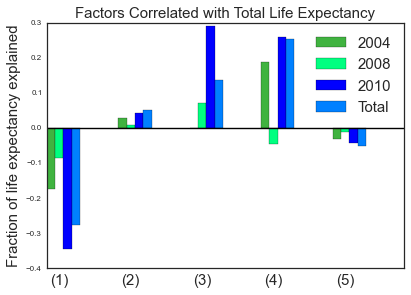

In [75]:
dictionary1 = {}
dictionary1['y'] = []
for key in file_list[0]:
    if key.isdigit():
        for number in range(len(file_list[0][key])):
            dictionary1['y'] += [file_list[0][key][number]]
for j in range(61):
    if j > 2 and j not in [56]: 
        dictionary1['x%d'%j] = []
        for key in file_list[j]:
            if key.isdigit():
                for number in range(len(file_list[j][key])):
                    dictionary1['x%d'%j] += [file_list[j][key][number]]
listertot = []
enumeratortot = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = dictionary1['y']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = dictionary1['x%d'%j]
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            listertot.append(model.rsquared_adj)
            enumeratortot.append(j)

dictionary = {}
dictionary['y'] = dictionary1['y']
string = "y~"
for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = dictionary1['x%d'%j]
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    modeltot = ols(formula = string,data=data).fit()
            
lister2010 = []
enumerator2010 = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2010']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister2010.append(model.rsquared_adj)
            enumerator2010.append(j)

dictionary = {}
dictionary['y'] = file_list[0]['2010']
string = "y~"
for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2010']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model2010 = ols(formula = string,data=data).fit()

lister2008 = []
enumerator2008 = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2008']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2008']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister2008.append(model.rsquared_adj)
            enumerator2008.append(j)

dictionary = {}
dictionary['y'] = file_list[2]['2008']
string = "y~"
for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2008']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model2008 = ols(formula = string,data=data).fit()
    
lister2004 = []
enumerator2004 = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2004']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2004']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister2004.append(model.rsquared_adj)
            enumerator2004.append(j)

dictionary = {}
dictionary['y'] = file_list[2]['2004']
string = "y~"
for j in s14:
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2004']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model2004 = ols(formula = string,data=data).fit()
    
lister2002 = []
enumerator2002 = []
for j in xrange(61):
    string = ""
    dictionary = {}
    dictionary['y'] = file_list[0]['2002']
    string = "y~"
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2002']
        string += 'x%d+'%j
        data = pd.DataFrame(dictionary)
        string = string[0:len(string)-1]
        if len(data.dropna())>1:
            model = ols(formula = string,data=data).fit()
            lister2002.append(model.rsquared_adj)
            enumerator2002.append(j)

dictionary = {}
dictionary['y'] = file_list[2]['2002']
string = "y~"
for j in s14:#[28, 32, 52, 51, 37]: #[8, 33, 7, 49, 32]: #: #, 52, 23, 27, 8, 19
    if j > 2 and j not in [56]: 
        dictionary['x%d'%j] = file_list[j]['2002']
        string += 'x%d+'%j

data = pd.DataFrame(dictionary)
        
string = string[0:len(string)-1]
if len(data.dropna())>1:
    model2002 = ols(formula = string,data=data).fit()

xsftot = []
for index in s14:
    xsftot += [listertot[index-3]]
xsftot = np.array(xsftot)
xsftot = xsftot/sum(xsftot)*modeltot.rsquared_adj

xsf2010 = []
for index in s14:
    xsf2010 += [lister2010[index-3]]
xsf2010 = np.array(xsf2010)
xsf2010 = xsf2010/sum(xsf2010)*model2010.rsquared_adj

xsf2008 = []
for index in s14:
    xsf2008 += [lister2008[index-3]]
xsf2008 = np.array(xsf2008)
xsf2008 = xsf2008/sum(xsf2008)*model2008.rsquared_adj

xsf2004 = []
for index in s14:
    xsf2004 += [lister2004[index-3]]
xsf2004 = np.array(xsf2004)
xsf2004 = xsf2004/sum(xsf2004)*model2004.rsquared_adj

xsf2002 = []
for index in s14:
    xsf2002 += [lister2002[index-3]]
xsf2002 = np.array(xsf2002)
xsf2002 = xsf2002/sum(xsf2002)*model2002.rsquared_adj
N = len(xsf2010)
ind = np.arange(N)
width = 0.35

p2 = plt.bar(ind+0*width/3., xsf2004,   width/3., color=(0.25,0.7,0.25), bottom=(-xsf2004[0],0,0,0,-xsf2004[4]))
p3 = plt.bar(ind+width/3.,xsf2008,width/3., color=(0,1,0.5),bottom=(-xsf2008[0],0,0,-xsf2008[3],-xsf2008[4]))
p4 = plt.bar(ind+2.*width/3.,xsf2010,width/3., color=(0,0,1),bottom=(-xsf2010[0],0,0,0,-xsf2010[4]))
p5 = plt.bar(ind+width,xsftot,width/3., color=(0,0.5,1),bottom=(-xsftot[0],0,0,0,-xsftot[4]))
plt.ylabel('Fraction of life expectancy explained',fontsize=15)
plt.title('Factors Correlated with Total Life Expectancy',fontsize=15)
plt.legend( (p2[0],p3[0],p4[0],p5[0]), ('2004','2008','2010','Total'),fontsize=15,loc='best')
plt.plot((ind[0],ind[4]+1.),(0,0),color='k')
plt.xticks(ind+width/2.,('(1)','(2)','(3)','(4)','(5)') ,fontsize=15 )
print '(1) '+file_list[s14[0]]['Indicator Name'][0]
print '(2) '+file_list[s14[1]]['Indicator Name'][0][:len(file_list[s14[1]]['Indicator Name'][0])-22]
print '(3) '+file_list[s14[2]]['Indicator Name'][0]
print '(4) '+file_list[s14[3]]['Indicator Name'][0]
print '(5) '+file_list[s14[4]]['Indicator Name'][0][:len(file_list[s14[4]]['Indicator Name'][0])-22]


In [73]:
# to check whether correlation is positive or negative
print modeltot.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     113.6
Date:                Tue, 12 May 2015   Prob (F-statistic):           5.94e-51
Time:                        15:55:06   Log-Likelihood:                -443.95
No. Observations:                 167   AIC:                             899.9
Df Residuals:                     161   BIC:                             918.6
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     53.9951      3.273     16.495      0.000        47.531    60.460
x39           -0.2283      0.033     -6.951      0.0

In [625]:
#f = open('data_file_keys.txt','r')
#lines = f.readlines()
#f.close()
#t = 1
#for line_number in xrange(len(lines)):
#    if lines[line_number][0] == 's' or lines[line_number][0] == 'G':
#        file_name = 'data_'
#        for j in xrange(7,14):
#            if lines[line_number][j] != '.':
#                file_name += lines[line_number][j]
#        print '#' + lines[line_number+1][1:len(lines[line_number+1])-1] + '----------------- %d' %t
#        print file_name + ' = pd.DataFrame.from_csv("'+lines[line_number][0:len(lines[line_number])-1]+'",header=2)'
#        print
#        t += 1

s7

[39, 9, 52, 23, 27, 8, 19]